## 로지스틱 회귀분석

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

In [2]:
# 통계 관련 라이브러리를 호출합니다.
from scipy import stats
import pingouin as pg

In [3]:
# 시각화 설정 모듈을 호출합니다.
from GraphicSetting import *

# 통계 분석 및 머신러닝 관련 모듈을 호출합니다.
import HelloDataScience as hds

### 실습 데이터셋 준비

In [4]:
# 인터넷에 공유 중인 텍스트 데이터를 읽고 데이터프레임 df를 생성합니다.
df = pd.read_csv(filepath_or_buffer = 'https://bit.ly/Univ_Admit')

In [5]:
# df의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   1687 non-null   object 
 1   gre     1687 non-null   float64
 2   gpa     1687 non-null   float64
 3   rank    1687 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 52.8+ KB


In [6]:
# df의 처음 5행을 출력합니다.
df.head()

,admit,gre,gpa,rank
0,Fail,380.0,3.61,3
1,Pass,660.0,3.67,3
2,Pass,800.0,4.00,1
3,Pass,640.0,3.19,4
4,Fail,520.0,2.93,4


In [7]:
# y절편 역할을 수행할 상수 1을 df의 두 번째 열로 삽입합니다.
df.insert(loc = 1, column = 'const', value = 1)

### 실습 데이터셋 전처리

In [8]:
# rank를 문자형으로 변환합니다.
df['rank'] = df['rank'].astype(str)

In [9]:
# 연속형 변수의 기술통계량을 확인합니다.
df.describe()

,const,gre,gpa
count,1687.0,1687.000000,1687.000000
mean,1.0,574.303497,3.346183
std,0.0,97.923750,0.321537
min,1.0,220.000000,2.260000
25%,1.0,510.000000,3.130000
50%,1.0,580.000000,3.360000
75%,1.0,640.000000,3.580000
max,1.0,800.000000,4.000000


In [10]:
# 범주형 변수의 기술통계량을 확인합니다.
df.describe(include = object)

,admit,rank
count,1687,1687
unique,2,4
top,Fail,2
freq,1163,568


In [11]:
# rank의 범주별 빈도수를 출력합니다.
df['rank'].value_counts().sort_index()

1    273
2    568
3    540
4    306
Name: rank, dtype: int64

### 목표변수 시각화

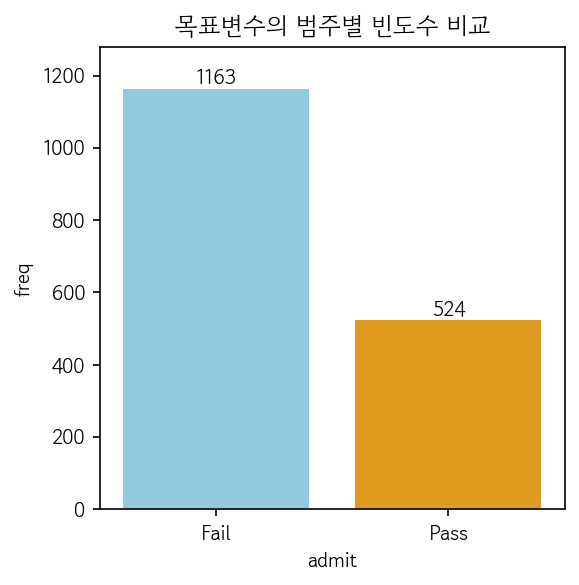

In [12]:
# 목표변수 범주별 빈도수로 일변량 막대 그래프를 그립니다.
hds.plot_bar_freq(
    data = df, 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)

### 입력변수와 관계 파악: gre

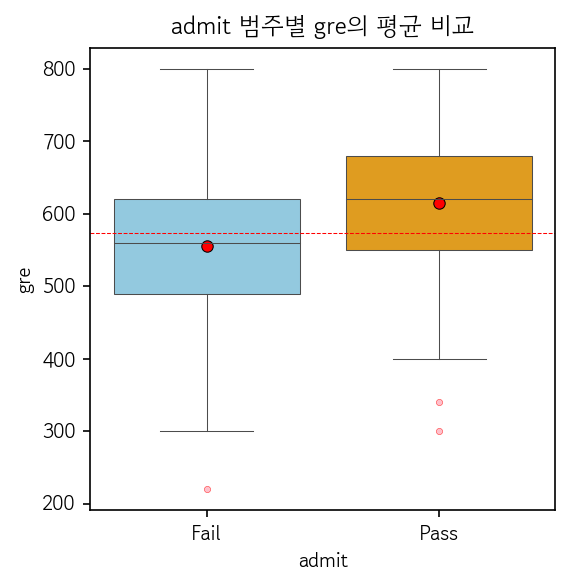

In [13]:
# admit 범주별 gre의 상자 수염 그림을 그립니다.
hds.plot_box_group(
    data = df, 
    x = 'admit', 
    y = 'gre', 
    pal = ['skyblue', 'orange']
)

### 입력변수와 관계 파악: gpa

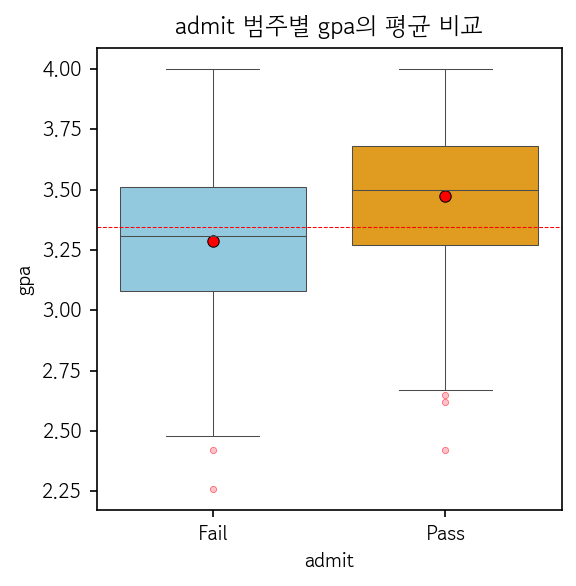

In [14]:
# admit 범주별 gpa의 상자 수염 그림을 그립니다.
hds.plot_box_group(
    data = df, 
    x = 'admit', 
    y = 'gpa', 
    pal = ['skyblue', 'orange']
)

### 입력변수와 관계 파악: rank

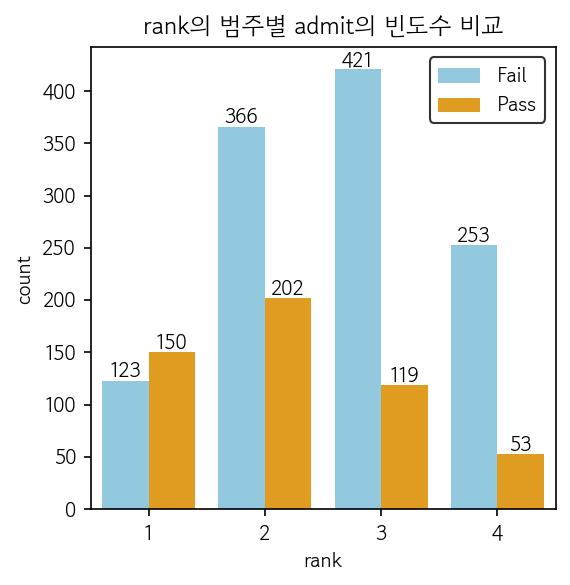

In [15]:
# rank 범주별 admit의 빈도수로 묶음 막대 그래프를 그립니다.
hds.plot_bar_dodge_freq(
    data = df, 
    x = 'rank', 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)

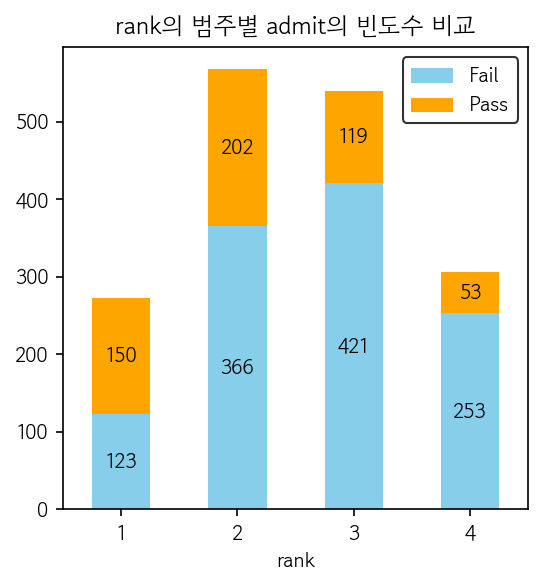

In [16]:
# rank 범주별 admit의 빈도수로 쌓은 막대 그래프를 그립니다.
hds.plot_bar_stack_freq(
    data = df, 
    x = 'rank', 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)

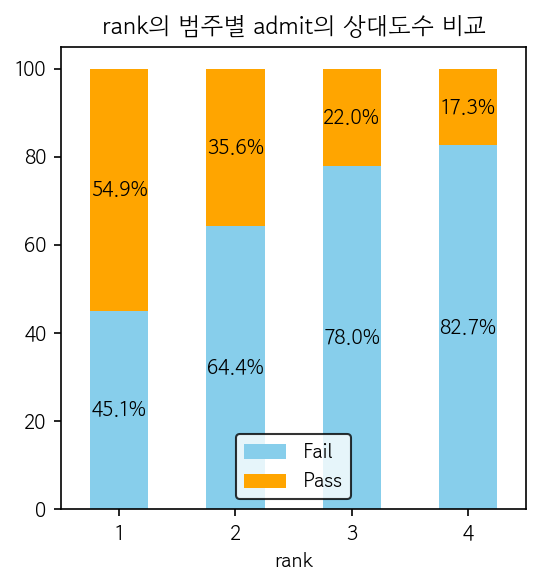

In [17]:
# rank 범주별 admit의 상대도수로 쌓은 막대 그래프를 그립니다.
hds.plot_bar_stack_prop(
    data = df, 
    x = 'rank', 
    y = 'admit', 
    pal = ['skyblue', 'orange']
)
plt.legend(loc = 'lower center');

### t-검정: gre

In [18]:
# (정규성 가정 만족) 등분산 검정을 실행합니다.
pg.homoscedasticity(data = df, dv = 'gre', group = 'admit')

,W,pval,equal_var
levene,3.596208,0.058082,True


In [19]:
# admit 범주별 gre로 시리즈를 생성합니다.
sp1 = df['gre'][df['admit'].eq('Fail')]
sp2 = df['gre'][df['admit'].eq('Pass')]

In [20]:
# (정규성 가정 만족) 등분산 가정된 독립표본 t-검정을 실행합니다.
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.849448,1685,two-sided,3.604961e-31,"[-68.38, -48.96]",0.623448,6.726e+27,1.0


### t-검정 : gpa

In [21]:
# (정규성 가정 만족) 등분산 검정을 실행합니다.
pg.homoscedasticity(data = df, dv = 'gpa', group = 'admit')

,W,pval,equal_var
levene,0.678495,0.410222,True


In [22]:
# admit 범주별 gpa로 시리즈를 생성합니다.
sp1 = df['gpa'][df['admit'].eq('Fail')]
sp2 = df['gpa'][df['admit'].eq('Pass')]

In [23]:
# (정규성 가정 만족) 등분산 가정된 독립표본 t-검정을 실행합니다.
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.50489,1685,two-sided,1.531444e-29,"[-0.22, -0.16]",0.605319,1.664e+26,1.0


### 교차분석: rank

In [24]:
# 범주형 입력변수 rank와 목표변수의 교차테이블을 출력합니다.
pd.crosstab(index = df['rank'], 
            columns = df['admit'], 
            normalize = 'index', 
            margins = True)

admit,Fail,Pass
rank,,
1,0.450549,0.549451
2,0.644366,0.355634
3,0.779630,0.220370
4,0.826797,0.173203
All,0.689389,0.310611


In [25]:
# 교차테이블 빈도수로 교차분석(카이제곱 검정)을 실행합니다.
pg.chi2_independence(data = df, x = 'rank', y = 'admit')

(admit        Fail        Pass
 rank                         
 1      188.203320   84.796680
 2      391.573207  176.426793
 3      372.270302  167.729698
 4      210.953171   95.046829,
 admit  Fail  Pass
 rank             
 1       123   150
 2       366   202
 3       421   119
 4       253    53,
                  test    lambda        chi2  dof          pval    cramer  \
 0             pearson  1.000000  125.621299  3.0  4.748649e-27  0.272882   
 1        cressie-read  0.666667  124.433926  3.0  8.558048e-27  0.271589   
 2      log-likelihood  0.000000  123.670615  3.0  1.249714e-26  0.270755   
 3       freeman-tukey -0.500000  124.456830  3.0  8.461367e-27  0.271614   
 4  mod-log-likelihood -1.000000  126.396483  3.0  3.232631e-27  0.273722   
 5              neyman -2.000000  133.872388  3.0  7.915429e-29  0.281701   
 
    power  
 0    1.0  
 1    1.0  
 2    1.0  
 3    1.0  
 4    1.0  
 5    1.0  )

### 더미변수 생성

In [26]:
# 범주형 입력변수로 더미변수를 생성합니다.
df = pd.get_dummies(data = df, prefix = ['rank', None], 
                    columns = ['rank', 'admit'], 
                    drop_first = True)

In [27]:
# df의 처음 10행을 출력합니다.
df.head(n = 10)

,const,gre,gpa,rank_2,rank_3,rank_4,Pass
0,1,380.0,3.61,0,1,0,0
1,1,660.0,3.67,0,1,0,1
2,1,800.0,4.00,0,0,0,1
3,1,640.0,3.19,0,0,1,1
4,1,520.0,2.93,0,0,1,0
5,1,760.0,3.00,1,0,0,1
6,1,560.0,2.98,0,0,0,1
7,1,400.0,3.08,1,0,0,0
8,1,540.0,3.39,0,1,0,1
9,1,700.0,3.92,1,0,0,0


In [28]:
# 목표변수명을 'admit'으로 변경합니다.
df = df.rename(columns = {'Pass': 'admit'})

### 실습 데이터셋 분할

In [29]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [30]:
# 전체 데이터의 70%를 훈련셋, 30%를 시험셋으로 분할합니다.
trSet, teSet = train_test_split(df, test_size = 0.3, random_state = 0)

In [31]:
# 훈련셋의 목표변수 범주별 상대도수를 확인합니다.
trSet['admit'].value_counts(normalize = True)

0    0.691525
1    0.308475
Name: admit, dtype: float64

In [32]:
# 시험셋의 목표변수 범주별 상대도수를 확인합니다.
teSet['admit'].value_counts(normalize = True)

0    0.684418
1    0.315582
Name: admit, dtype: float64

### 입력변수와 목표변수 분리

In [33]:
# 목표변수명을 변수에 할당합니다.
yvar = 'admit'

In [34]:
# 훈련셋을 목표변수 벡터와 입력변수 행렬로 분리합니다.
trReal = trSet[yvar].copy()
trSetX = trSet.drop(columns = [yvar])

In [35]:
# 시험셋을 목표변수 벡터와 입력변수 행렬로 분리합니다.
teReal = teSet[yvar].copy()
teSetX = teSet.drop(columns = [yvar])

### 로지스틱 회귀모형 적합 함수 생성

In [36]:
# 관련 라이브러리를 호출합니다.
import statsmodels.api as sa

In [37]:
# 로지스틱 회귀모형을 반환하는 함수를 생성합니다.
def glm(y, X):
    model = sa.GLM(endog = y, exog = X, family = sa.families.Binomial())
    return model.fit()

### 로지스틱 회귀모형 적합 및 결과 확인

In [38]:
# 훈련셋으로 로지스틱 회귀모형을 적합합니다.
fit1 = glm(y = trReal, X = trSetX)

In [39]:
# fit1 모형의 적합 결과를 확인합니다.
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                 1180
Model:                            GLM   Df Residuals:                     1174
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -637.55
Date:                Mon, 23 Jan 2023   Deviance:                       1275.1
Time:                        17:31:30   Pearson chi2:                 1.16e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1437
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2059      0.858     -7.235      0.000      -7.887      -4.525
gre            0.0040      0.001      3.399      0.001       0.002       0.006
gpa            1.1545      0.363      3.183      0.001       0.444       1.865
rank_2        -0.6268      0.189     -3.323      0.001      -0.997      -0.257
rank_3        -1.3495      0.201     -6.716      0.000      -1.743      -0.956
rank_4        -1.6492      0.247     -6.687      0.000      -2.133      -1.166
==============================================================================
"""

### 로지스틱 회귀모형의 유의성 검정

In [40]:
# 두 모형의 이탈도 차이를 출력합니다.(검정통계량)
devGap = fit1.null_deviance - fit1.deviance
devGap

183.08041695158568

In [41]:
# 두 모형의 자유도 차이를 출력합니다.(카이제곱 분포의 자유도)
dofGap = fit1.df_model
dofGap

5

In [42]:
# 검정통계량과 자유도로 유의확률을 출력합니다.
1 - stats.chi2.cdf(x = devGap, df = dofGap)

0.0

### 다중공선성 확인

In [43]:
# 분산팽창지수를 출력하고 다중공선성 입력변수를 확인합니다.
hds.vif(X = trSetX)

,gre,gpa,rank_2,rank_3,rank_4
0,2.83206,2.815849,2.051839,2.042184,1.734154


### 오즈비 확인

In [44]:
# 입력변수별 회귀계수의 오즈비를 출력합니다.
np.exp(fit1.params)

const     0.002017
gre       1.004042
gpa       3.172317
rank_2    0.534278
rank_3    0.259375
rank_4    0.192202
dtype: float64

### 표준화 회귀계수 확인

In [45]:
# fit1 모형의 회귀계수를 출력합니다.
fit1.params

const    -6.205935
gre       0.004034
gpa       1.154462
rank_2   -0.626838
rank_3   -1.349479
rank_4   -1.649208
dtype: float64

In [46]:
# 표준화 회귀계수를 생성합니다.
beta_z = hds.std_coefs(model = fit1)
beta_z

const    -0.000000
gre       0.396631
gpa       0.367046
rank_2   -0.297029
rank_3   -0.630819
rank_4   -0.627508
dtype: float64

In [47]:
# 표준화 회귀계수의 절대값을 오름차순 정렬한 결과를 출력합니다.
beta_z.abs().sort_values()

const     0.000000
rank_2    0.297029
gpa       0.367046
gre       0.396631
rank_4    0.627508
rank_3    0.630819
dtype: float64

### 목표변수의 추정확률 생성

In [48]:
# 훈련셋으로 fit1 모형의 추정확률을 생성하고 실제값과 비교합니다.
trProb = fit1.predict(exog = trSetX)
pd.DataFrame(data = {'Real': trReal, 'Prob': trProb})

,Real,Prob
1679,0,0.480613
519,0,0.176788
522,0,0.142095
140,0,0.571049
878,0,0.348149
...,...,...
835,0,0.328780
1216,1,0.319978
1653,1,0.604055
559,0,0.348531


In [49]:
# 시험셋으로 fit1 모형의 추정확률을 생성하고 실제값과 비교합니다.
teProb = fit1.predict(exog = teSetX)
pd.DataFrame(data = {'Real': teReal, 'Prob': teProb})

,Real,Prob
34,0,0.244416
740,1,0.373813
638,0,0.268570
901,0,0.286210
1188,1,0.444333
...,...,...
1017,0,0.490249
568,0,0.348531
362,0,0.385913
904,0,0.288574


### 분류모형 성능 평가 : ROC 곡선

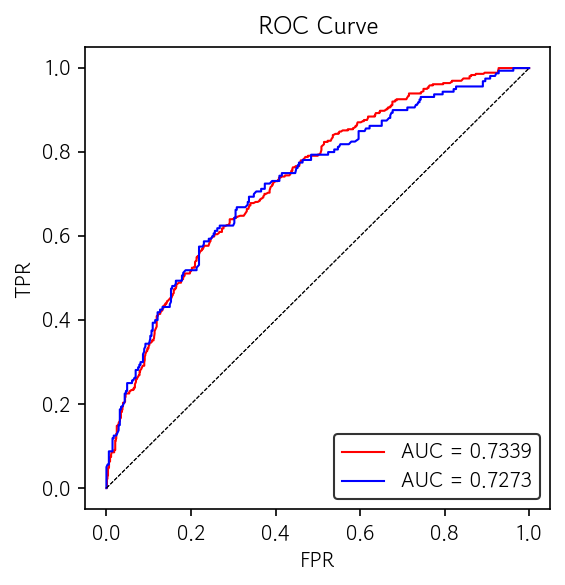

In [50]:
# 훈련셋과 시험셋의 추정확률로 ROC 곡선을 그립니다.
hds.plot_roc(y_true = trReal, y_prob = trProb, color = 'red')
hds.plot_roc(y_true = teReal, y_prob = teProb, color = 'blue')

### 목표변수의 추정값 생성

In [51]:
# 분리 기준점을 0.5로 설정합니다.
cutoff = 0.5

In [52]:
# 훈련셋의 목표변수 추정값(라벨)을 생성합니다.
trPred1 = np.where(trProb >= cutoff, 1, 0)

In [53]:
# 시험셋의 목표변수 추정값(라벨)을 생성합니다.
tePred1 = np.where(teProb >= cutoff, 1, 0)

### 분류모형 성능 평가 : 혼동행렬 리포트

In [54]:
# 훈련셋 추정값으로 혼동행렬 리포트를 출력합니다.
hds.clfmetrics(y_true = trReal, y_pred = trPred1)

▶ Confusion Matrix
[[739  77]
 [246 118]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7503    0.9056    0.8207       816
           1     0.6051    0.3242    0.4222       364

    accuracy                         0.7263      1180
   macro avg     0.6777    0.6149    0.6214      1180
weighted avg     0.7055    0.7263    0.6977      1180



In [55]:
# 시험셋 추정값으로 혼동행렬 리포트를 출력합니다.
hds.clfmetrics(y_true = teReal, y_pred = tePred1)

▶ Confusion Matrix
[[316  31]
 [108  52]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7453    0.9107    0.8197       347
           1     0.6265    0.3250    0.4280       160

    accuracy                         0.7258       507
   macro avg     0.6859    0.6178    0.6238       507
weighted avg     0.7078    0.7258    0.6961       507



### [참고] 혼동행렬 관련 함수

In [56]:
# 관련 라이브러리를 호출합니다.
from sklearn import metrics

In [57]:
# 시험셋 추정값으로 혼동행렬을 출력합니다.
print(metrics.confusion_matrix(y_true = teReal, y_pred = tePred1))

[[316  31]
 [108  52]]


In [58]:
# 시험셋 추정값으로 분류모형 리포트를 출력합니다.
print(metrics.classification_report(y_true = teReal, y_pred = tePred1))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       347
           1       0.63      0.33      0.43       160

    accuracy                           0.73       507
   macro avg       0.69      0.62      0.62       507
weighted avg       0.71      0.73      0.70       507



In [59]:
# 시험셋 추정값으로 F1 점수를 출력합니다.
metrics.f1_score(y_true = teReal, y_pred = tePred1, pos_label = 1)

0.42798353909465026

### [참고] 목표변수의 범주별 추정확률 분포

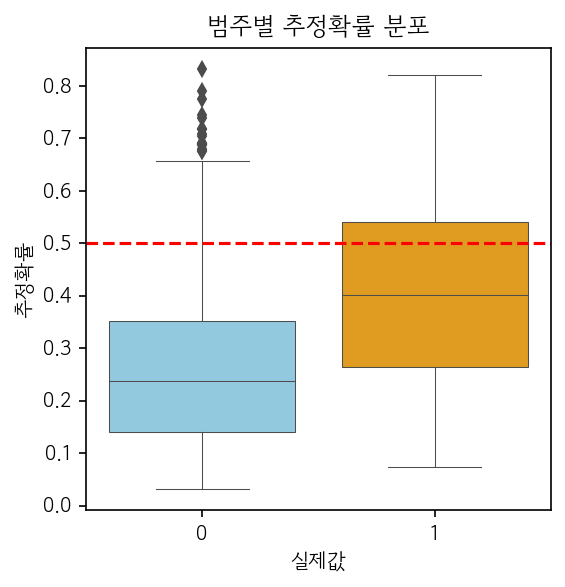

In [60]:
# 목표변수 범주별 추정확률 분포를 확인합니다.
sns.boxplot(x = trReal, y = trProb)
plt.title(label = '범주별 추정확률 분포')
plt.xlabel(xlabel = '실제값')
plt.ylabel(ylabel = '추정확률')
plt.axhline(y = 0.5, color = 'red', lw = 1.5, ls = '--');

### [참고] 최적의 분리 기준점 탐색

In [61]:
# 분리 기준점마다 분류모형의 성능지표를 계산한 데이터프레임을 생성합니다.
cfm = hds.clfCutoffs(y_true = trReal, y_prob = trProb)
cfm

,Cutoff,Sensitivity,Specificity,Optimal,Precision,TPR,FPR,MCC
0,0.00,1.0,0.000000,1.000000,0.308475,1.0,1.000000,0.000000
1,0.01,1.0,0.000000,1.000000,0.308475,1.0,1.000000,0.000000
2,0.02,1.0,0.000000,1.000000,0.308475,1.0,1.000000,0.000000
3,0.03,1.0,0.000000,1.000000,0.308475,1.0,1.000000,0.000000
4,0.04,1.0,0.012255,1.012255,0.311111,1.0,0.987745,0.061747
...,...,...,...,...,...,...,...,...
96,0.96,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000
97,0.97,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000
98,0.98,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000
99,0.99,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000


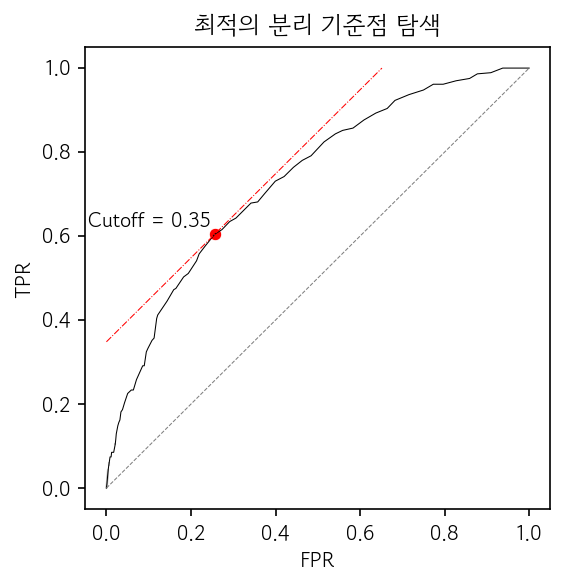

In [62]:
# 민감도와 특이도의 합계가 최댓값일 때의 분리 기준점을 확인합니다.
hds.EpiROC(obj = cfm)

### [참고] 최적의 분리 기준점으로 성능지표 확인

In [63]:
# 최적의 분리 기준점을 설정합니다.
cutoff = 0.35

In [64]:
# 분리 기준점 변경 후 시험셋의 목표변수 추정값(라벨)을 생성합니다.
tePred2 = np.where(teProb >= cutoff, 1, 0)

In [65]:
# 분리 기준점 변경 후 시험셋 추정값으로 혼동행렬과 F1 점수를 확인합니다.
hds.clfmetrics(y_true = teReal, y_pred = tePred2)

▶ Confusion Matrix
[[264  83]
 [ 66  94]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.8000    0.7608    0.7799       347
           1     0.5311    0.5875    0.5579       160

    accuracy                         0.7061       507
   macro avg     0.6655    0.6742    0.6689       507
weighted avg     0.7151    0.7061    0.7098       507



In [66]:
# 분리 기준점 변경 전 시험셋 추정값으로 혼동행렬과 F1 점수를 확인합니다.
hds.clfmetrics(y_true = teReal, y_pred = tePred1)

▶ Confusion Matrix
[[316  31]
 [108  52]]

▶ Classification Report
              precision    recall  f1-score   support

           0     0.7453    0.9107    0.8197       347
           1     0.6265    0.3250    0.4280       160

    accuracy                         0.7258       507
   macro avg     0.6859    0.6178    0.6238       507
weighted avg     0.7078    0.7258    0.6961       507



### [참고] 매튜의 상관계수

In [67]:
# 분리 기준점 변경 후 시험셋 추정값으로 매튜의 상관계수를 확인합니다.
metrics.matthews_corrcoef(y_true = teReal, y_pred = tePred2)

0.33958087578821944

In [68]:
# 분리 기준점 변경 전 시험셋 추정값으로 매튜의 상관계수를 확인합니다.
metrics.matthews_corrcoef(y_true = teReal, y_pred = tePred1)

0.2960014457302028

## End of Document